In [3]:
import pandas as pd

# 파일 불러오기
승인매출정보 = pd.read_parquet("merged_승인매출정보.parquet")
회원정보 = pd.read_parquet("merged_회원정보.parquet")

# 'RP건수' 포함 컬럼명 추출
rp_columns = [col for col in 승인매출정보.columns if 'RP건수' in col]

# ID + RP건수 컬럼만 추출
승인_RP = 승인매출정보[['ID'] + rp_columns]

# ▶ RP건수 컬럼을 ID 기준으로 집계 (sum 또는 count)
RP_집계 = 승인_RP.groupby('ID')[rp_columns].sum().reset_index()

# 회원정보에서 ID와 Segment 추출
회원_선택 = 회원정보[['ID', 'Segment']]

# 병합 (고객 단위로)
병합결과 = pd.merge(RP_집계, 회원_선택, on='ID', how='left')

# 확인
print("병합 후 shape:", 병합결과.shape)
print(병합결과.head())


병합 후 shape: (2400000, 26)
             ID  RP건수_B0M  RP건수_통신_B0M  RP건수_아파트_B0M  RP건수_제휴사서비스직접판매_B0M  \
0  TRAIN_000000        11            0             0                    6   
1  TRAIN_000000        11            0             0                    6   
2  TRAIN_000000        11            0             0                    6   
3  TRAIN_000000        11            0             0                    6   
4  TRAIN_000000        11            0             0                    6   

   RP건수_렌탈_B0M  RP건수_가스_B0M  RP건수_전기_B0M  RP건수_보험_B0M  RP건수_학습비_B0M  ...  \
0            0            0            0            5             0  ...   
1            0            0            0            5             0  ...   
2            0            0            0            5             0  ...   
3            0            0            0            5             0  ...   
4            0            0            0            5             0  ...   

   증감_RP건수_제휴사서비스직접판매_전월  증감_RP건수_렌탈_전월  증감_RP건수_가스_전월

In [4]:
병합결과

,ID,RP건수_B0M,RP건수_통신_B0M,RP건수_아파트_B0M,RP건수_제휴사서비스직접판매_B0M,RP건수_렌탈_B0M,RP건수_가스_B0M,RP건수_전기_B0M,RP건수_보험_B0M,RP건수_학습비_B0M,...,증감_RP건수_제휴사서비스직접판매_전월,증감_RP건수_렌탈_전월,증감_RP건수_가스_전월,증감_RP건수_전기_전월,증감_RP건수_보험_전월,증감_RP건수_학습비_전월,증감_RP건수_유선방송_전월,증감_RP건수_건강_전월,증감_RP건수_교통_전월,Segment
0,TRAIN_000000,11,0,0,6,0,0,0,5,0,...,0,0,0,0,1,0,0,0,0,D
1,TRAIN_000000,11,0,0,6,0,0,0,5,0,...,0,0,0,0,1,0,0,0,0,D
2,TRAIN_000000,11,0,0,6,0,0,0,5,0,...,0,0,0,0,1,0,0,0,0,D
3,TRAIN_000000,11,0,0,6,0,0,0,5,0,...,0,0,0,0,1,0,0,0,0,D
4,TRAIN_000000,11,0,0,6,0,0,0,5,0,...,0,0,0,0,1,0,0,0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,TRAIN_399999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399997,TRAIN_399999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399998,TRAIN_399999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [5]:
# 결측치 수와 비율 확인
missing_counts = 병합결과.isnull().sum()
missing_ratio = (missing_counts / len(병합결과)) * 100

# 결측치 정보 테이블 생성
결측치_정보 = pd.DataFrame({
    '결측치 수': missing_counts,
    '결측치 비율(%)': missing_ratio
}).sort_values(by='결측치 수', ascending=False)

# 결과 출력
결측치_정보

,결측치 수,결측치 비율(%)
ID,0,0.0
RP건수_B0M,0,0.0
증감_RP건수_교통_전월,0,0.0
증감_RP건수_건강_전월,0,0.0
증감_RP건수_유선방송_전월,0,0.0
증감_RP건수_학습비_전월,0,0.0
증감_RP건수_보험_전월,0,0.0
증감_RP건수_전기_전월,0,0.0
증감_RP건수_가스_전월,0,0.0
증감_RP건수_렌탈_전월,0,0.0


In [6]:
import pandas as pd

# 1. RP건수 컬럼 분리
rp_columns = [col for col in 병합결과.columns if 'RP건수' in col]
rp_columns_전월 = [col for col in rp_columns if col.endswith('_전월')]
rp_columns_B0M = [col for col in rp_columns if col.endswith('_B0M')]

# 2. 분포 생성 함수 정의
def segment_rp_presence(df, cols, label):
    temp = df[['Segment'] + cols].copy()
    temp_bool = temp[cols].notnull() & (temp[cols] != 0)
    temp_bool['Segment'] = temp['Segment']
    
    # long format
    temp_melt = temp_bool.melt(id_vars='Segment', var_name='RP컬럼', value_name='존재여부')
    분포 = temp_melt[temp_melt['존재여부']].groupby(['RP컬럼', 'Segment']).size().unstack(fill_value=0)
    분포['RP타입'] = label
    return 분포

# 3. 전월, B0M 각각 분석
전월_분포 = segment_rp_presence(병합결과, rp_columns_전월, '전월')
B0M_분포 = segment_rp_presence(병합결과, rp_columns_B0M, 'B0M')

# 4. 결과 결합
분포_전체 = pd.concat([전월_분포, B0M_분포])

# 5. 숫자 컬럼만 int로 변환 (Segment 0,1,2,3)
for col in 분포_전체.columns:
    if isinstance(col, int):
        분포_전체[col] = 분포_전체[col].astype(int)

# 6. 결과 확인
분포_전체


Segment,A,B,C,D,E,RP타입
RP컬럼,,,,,,
증감_RP건수_가스_전월,12,6,1164,2598,6078,전월
증감_RP건수_교통_전월,216,30,27636,68706,215496,전월
증감_RP건수_렌탈_전월,42,6,786,1950,10266,전월
증감_RP건수_보험_전월,12,12,1584,3558,13704,전월
증감_RP건수_아파트_전월,0,0,276,594,1266,전월
증감_RP건수_전기_전월,6,6,840,2046,4926,전월
증감_RP건수_전월,288,48,33168,81564,271464,전월
증감_RP건수_제휴사서비스직접판매_전월,0,0,84,366,6102,전월
증감_RP건수_통신_전월,60,24,5478,11508,35250,전월


In [7]:
import pandas as pd

# 1. Segment별 고객 수 (기준 분모)
segment_total = 병합결과['Segment'].value_counts().sort_index()

# 2. RP건수 컬럼 분리
rp_columns = [col for col in 병합결과.columns if 'RP건수' in col]
rp_columns_전월 = [col for col in rp_columns if col.endswith('_전월')]
rp_columns_B0M = [col for col in rp_columns if col.endswith('_B0M')]

# 3. 분석 함수: 존재 비율까지 포함
def segment_rp_presence_ratio(df, cols, label):
    temp = df[['Segment'] + cols].copy()
    temp_bool = temp[cols].notnull() & (temp[cols] != 0)
    temp_bool['Segment'] = temp['Segment']
    
    # melt
    temp_melt = temp_bool.melt(id_vars='Segment', var_name='RP컬럼', value_name='존재여부')
    
    # 존재 건수 (분자)
    count_df = temp_melt[temp_melt['존재여부']].groupby(['RP컬럼', 'Segment']).size().unstack(fill_value=0)
    
    # 비율 계산 (분자 / Segment 총 수)
    ratio_df = count_df.copy()
    for seg in ratio_df.columns:
        ratio_df[seg] = ratio_df[seg] / segment_total[seg]
    
    # 비율은 따로 접미사 붙이기
    ratio_df.columns = [f'{col}_비율' for col in ratio_df.columns]
    
    # 건수 + 비율 합치기
    result = pd.concat([count_df, ratio_df], axis=1)
    result['RP타입'] = label
    return result

# 4. 전월 / B0M 각각 분석
전월_비율 = segment_rp_presence_ratio(병합결과, rp_columns_전월, '전월')
B0M_비율 = segment_rp_presence_ratio(병합결과, rp_columns_B0M, 'B0M')

# 5. 병합
분포_비율_전체 = pd.concat([전월_비율, B0M_비율])

# 6. 보기 좋게 정렬
분포_비율_전체 = 분포_비율_전체.sort_values(by='RP타입')

# 7. 결과 출력 (Pandas DataFrame 그대로 출력)
분포_비율_전체.head(20)  # 처음 20행만 보기 (원하시면 전체도 가능)


,A,B,C,D,E,A_비율,B_비율,C_비율,D_비율,E_비율,RP타입
RP컬럼,,,,,,,,,,,
RP건수_학습비_B0M,0,6,252,330,2778,0.000000,0.041667,0.001975,0.000945,0.001445,B0M
RP건수_제휴사서비스직접판매_B0M,48,6,12084,35190,213204,0.049383,0.041667,0.094710,0.100761,0.110925,B0M
RP건수_전기_B0M,24,12,1326,3648,8010,0.024691,0.083333,0.010393,0.010445,0.004167,B0M
RP건수_아파트_B0M,24,0,8886,20514,47118,0.024691,0.000000,0.069645,0.058739,0.024514,B0M
RP건수_보험_B0M,18,24,3042,6882,23436,0.018519,0.166667,0.023842,0.019706,0.012193,B0M
RP건수_렌탈_B0M,54,12,1050,2592,13944,0.055556,0.083333,0.008229,0.007422,0.007255,B0M
RP건수_교통_B0M,456,60,54348,135234,385650,0.469136,0.416667,0.425958,0.387221,0.200645,B0M
RP건수_가스_B0M,12,6,2766,6318,16194,0.012346,0.041667,0.021679,0.018091,0.008425,B0M
RP건수_B0M,684,102,83220,227136,880608,0.703704,0.708333,0.652245,0.650369,0.458160,B0M


In [8]:
# 1. 비율 컬럼 이름 추출 (ex: '0_비율', '1_비율' 등)
비율컬럼 = [col for col in 분포_비율_전체.columns if isinstance(col, str) and col.endswith('_비율')]

# 2. 비율을 % 단위로 변환
for col in 비율컬럼:
    분포_비율_전체[col] = (분포_비율_전체[col] * 100).round(2)  # 소수점 둘째 자리까지

# 3. 결과 출력
분포_비율_전체.head(20)

,A,B,C,D,E,A_비율,B_비율,C_비율,D_비율,E_비율,RP타입
RP컬럼,,,,,,,,,,,
RP건수_학습비_B0M,0,6,252,330,2778,0.00,4.17,0.20,0.09,0.14,B0M
RP건수_제휴사서비스직접판매_B0M,48,6,12084,35190,213204,4.94,4.17,9.47,10.08,11.09,B0M
RP건수_전기_B0M,24,12,1326,3648,8010,2.47,8.33,1.04,1.04,0.42,B0M
RP건수_아파트_B0M,24,0,8886,20514,47118,2.47,0.00,6.96,5.87,2.45,B0M
RP건수_보험_B0M,18,24,3042,6882,23436,1.85,16.67,2.38,1.97,1.22,B0M
RP건수_렌탈_B0M,54,12,1050,2592,13944,5.56,8.33,0.82,0.74,0.73,B0M
RP건수_교통_B0M,456,60,54348,135234,385650,46.91,41.67,42.60,38.72,20.06,B0M
RP건수_가스_B0M,12,6,2766,6318,16194,1.23,4.17,2.17,1.81,0.84,B0M
RP건수_B0M,684,102,83220,227136,880608,70.37,70.83,65.22,65.04,45.82,B0M


In [9]:
# 1. 비율 컬럼만 추출 (이미 완료된 변수: 비율컬럼)

# 2. 비중 표준편차 계산
분포_비율_전체['비율표준편차'] = 분포_비율_전체[비율컬럼].std(axis=1)

# 3. 정렬해서 유의미한 컬럼 보기
top_std = 분포_비율_전체.sort_values(by='비율표준편차', ascending=False)

# 4. 상위 10개 확인
top_std.head(10)

,A,B,C,D,E,A_비율,B_비율,C_비율,D_비율,E_비율,RP타입,비율표준편차
RP컬럼,,,,,,,,,,,,
RP건수_통신_B0M,462,72,53430,141582,434196,47.53,50.00,41.88,40.54,22.59,B0M,10.751101
RP건수_교통_B0M,456,60,54348,135234,385650,46.91,41.67,42.60,38.72,20.06,B0M,10.444839
RP건수_B0M,684,102,83220,227136,880608,70.37,70.83,65.22,65.04,45.82,B0M,10.232650
증감_RP건수_전월,288,48,33168,81564,271464,29.63,33.33,26.00,23.35,14.12,전월,7.288925
RP건수_보험_B0M,18,24,3042,6882,23436,1.85,16.67,2.38,1.97,1.22,B0M,6.638514
증감_RP건수_통신_전월,60,24,5478,11508,35250,6.17,16.67,4.29,3.30,1.83,전월,5.925776
증감_RP건수_교통_전월,216,30,27636,68706,215496,22.22,20.83,21.66,19.67,11.21,전월,4.523723
RP건수_렌탈_B0M,54,12,1050,2592,13944,5.56,8.33,0.82,0.74,0.73,B0M,3.524802
증감_RP건수_보험_전월,12,12,1584,3558,13704,1.23,8.33,1.24,1.02,0.71,전월,3.262810


In [10]:
# 최대-최소 차이도 함께 구하고 싶다면
분포_비율_전체['비율차'] = 분포_비율_전체[비율컬럼].max(axis=1) - 분포_비율_전체[비율컬럼].min(axis=1)

# 정렬 예시
top_gap = 분포_비율_전체.sort_values(by='비율차', ascending=False)
top_gap.head(10)

,A,B,C,D,E,A_비율,B_비율,C_비율,D_비율,E_비율,RP타입,비율표준편차,비율차
RP컬럼,,,,,,,,,,,,,
RP건수_통신_B0M,462,72,53430,141582,434196,47.53,50.00,41.88,40.54,22.59,B0M,10.751101,27.41
RP건수_교통_B0M,456,60,54348,135234,385650,46.91,41.67,42.60,38.72,20.06,B0M,10.444839,26.85
RP건수_B0M,684,102,83220,227136,880608,70.37,70.83,65.22,65.04,45.82,B0M,10.232650,25.01
증감_RP건수_전월,288,48,33168,81564,271464,29.63,33.33,26.00,23.35,14.12,전월,7.288925,19.21
RP건수_보험_B0M,18,24,3042,6882,23436,1.85,16.67,2.38,1.97,1.22,B0M,6.638514,15.45
증감_RP건수_통신_전월,60,24,5478,11508,35250,6.17,16.67,4.29,3.30,1.83,전월,5.925776,14.84
증감_RP건수_교통_전월,216,30,27636,68706,215496,22.22,20.83,21.66,19.67,11.21,전월,4.523723,11.01
RP건수_전기_B0M,24,12,1326,3648,8010,2.47,8.33,1.04,1.04,0.42,B0M,3.257737,7.91
증감_RP건수_보험_전월,12,12,1584,3558,13704,1.23,8.33,1.24,1.02,0.71,전월,3.262810,7.62


| RP컬럼              | A\_비율 | B\_비율     | C\_비율 | D\_비율 | E\_비율 | 비율표준편차    | 해석                                          |
| ----------------- | ----- | --------- | ----- | ----- | ----- | --------- | ------------------------------------------- |
| **RP건수\_통신\_B0M** | 47.5  | 50.0      | 41.9  | 40.5  | 22.6  | **10.75** | E만 낮고, A\~D는 고르게 높음 → **Segment E 구분에 좋음**  |
| **RP건수\_보험\_B0M** | 1.85  | **16.67** | 2.38  | 1.97  | 1.22  | **6.64**  | B만 월등히 높고 나머진 낮음 → **Segment B만 구분 가능**     |
| **RP건수\_렌탈\_B0M** | 5.56  | 8.33      | 0.82  | 0.74  | 0.73  | **3.52**  | A/B는 중간, C\~E는 매우 낮음 → **일부 Segment 구분 신호** |
| **RP건수\_전기\_B0M** | 2.47  | 8.33      | 1.04  | 1.04  | 0.42  | **3.26**  | B가 살짝 높고, 나머지는 매우 낮음 → **중간 신호**            |


| 표준편차 수준      | 해석                       | 분류에 유용도      |
| ------------ | ------------------------ | ------------ |
| **10 이상**    | Segment 간 뚜렷한 편차 → 강한 신호 | ✅ 매우 유용      |
| **5\~10 사이** | 일부 Segment 중심 편차 존재      | ⚠️ 상황에 따라 유용 |
| **3 이하**     | 대부분 Segment 유사한 수준       | 🚫 유의미하지 않음  | 

In [13]:
# 'RP후경과월' 포함 컬럼명 추출
rp_month = [col for col in 승인매출정보.columns if 'RP후경과월' in col]

# ID + RP후경과월 컬럼만 추출
승인경과월_RP = 승인매출정보[['ID'] + rp_month]

# ▶ RP후경과월 컬럼을 ID 기준으로 집계 (sum 또는 count)
RP_월집계 = 승인경과월_RP.groupby('ID')[rp_month].sum().reset_index()

# 회원정보에서 ID와 Segment 추출
회원_선택 = 회원정보[['ID', 'Segment']]

# 병합 (고객 단위로)
병합결과 = pd.merge(RP_월집계, 회원_선택, on='ID', how='left')

# 확인
print("병합 후 shape:", 병합결과.shape)
print(병합결과.head())

병합 후 shape: (2400000, 14)
             ID  RP후경과월  RP후경과월_통신  RP후경과월_아파트  RP후경과월_제휴사서비스직접판매  RP후경과월_렌탈  \
0  TRAIN_000000       0         36          36                  0         36   
1  TRAIN_000000       0         36          36                  0         36   
2  TRAIN_000000       0         36          36                  0         36   
3  TRAIN_000000       0         36          36                  0         36   
4  TRAIN_000000       0         36          36                  0         36   

   RP후경과월_가스  RP후경과월_전기  RP후경과월_보험  RP후경과월_학습비  RP후경과월_유선방송  RP후경과월_건강  \
0         36         36          1          36           36         36   
1         36         36          1          36           36         36   
2         36         36          1          36           36         36   
3         36         36          1          36           36         36   
4         36         36          1          36           36         36   

   RP후경과월_교통 Segment  
0         26       D  
1 

In [14]:
# 7. 0이 아닌 값들의 분포 요약
rp_elapsed_summary = 병합결과[rp_month].apply(
    lambda col: pd.Series({
        '0이 아닌 값 개수': (col != 0).sum(),
        '평균 (0 제외)': col[col != 0].mean(),
        '최소 (0 제외)': col[col != 0].min(),
        '최대 (0 제외)': col[col != 0].max(),
        '0 제외 표준편차': col[col != 0].std()
    })
).T

# 8. 결과 확인
rp_elapsed_summary

,0이 아닌 값 개수,평균 (0 제외),최소 (0 제외),최대 (0 제외),0 제외 표준편차
RP후경과월,1329522.0,32.710033,1.0,36.0,8.538067
RP후경과월_통신,1799298.0,35.566928,1.0,36.0,3.440005
RP후경과월_아파트,2326116.0,35.969738,1.0,36.0,0.914319
RP후경과월_제휴사서비스직접판매,2146506.0,35.892202,1.0,36.0,1.699918
RP후경과월_렌탈,2398548.0,35.813337,1.0,36.0,2.259273
RP후경과월_가스,2391096.0,35.809732,1.0,36.0,2.330042
RP후경과월_전기,2398374.0,35.864195,1.0,36.0,1.926498
RP후경과월_보험,2393664.0,35.660870,1.0,36.0,3.148618
RP후경과월_학습비,2399808.0,35.962520,1.0,36.0,0.958854
RP후경과월_유선방송,2400000.0,36.000000,36.0,36.0,0.000000


In [15]:
# RP후경과월 컬럼 추출
rp_month_cols = [col for col in 병합결과.columns if 'RP후경과월' in col]

# Segment별로 그룹화해서 분석
def summarize_segment(df, cols):
    summary_list = []
    for seg, group in df.groupby('Segment'):
        temp = group[cols].copy()
        result = temp.apply(
            lambda col: pd.Series({
                '0이상 건수': (col != 0).sum(),
                '평균 (0제외)': col[col != 0].mean(),
                '표준편차 (0제외)': col[col != 0].std()
            })
        ).T
        result['Segment'] = seg
        summary_list.append(result)
    return pd.concat(summary_list)

# 실행
segment_rp_elapsed_summary = summarize_segment(병합결과, rp_month_cols)

# 보기 좋게 정리
segment_rp_elapsed_summary = segment_rp_elapsed_summary.reset_index().rename(columns={'index': 'RP컬럼'})

# 결과 확인
segment_rp_elapsed_summary.head(20)

,RP컬럼,0이상 건수,평균 (0제외),표준편차 (0제외),Segment
0,RP후경과월,336.0,31.392857,10.438182,A
1,RP후경과월_통신,522.0,35.264368,4.821879,A
2,RP후경과월_아파트,948.0,36.000000,0.000000,A
3,RP후경과월_제휴사서비스직접판매,924.0,36.000000,0.000000,A
4,RP후경과월_렌탈,972.0,34.666667,5.626918,A
5,RP후경과월_가스,972.0,35.802469,2.088188,A
6,RP후경과월_전기,960.0,35.575000,3.781107,A
7,RP후경과월_보험,972.0,35.598765,3.025045,A
8,RP후경과월_학습비,972.0,36.000000,0.000000,A
9,RP후경과월_유선방송,972.0,36.000000,0.000000,A


In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows인 경우
plt.rcParams['font.family'] = 'Malgun Gothic'

# 혹시 Mac이라면 (선택)
# plt.rcParams['font.family'] = 'AppleGothic'

# 음수 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

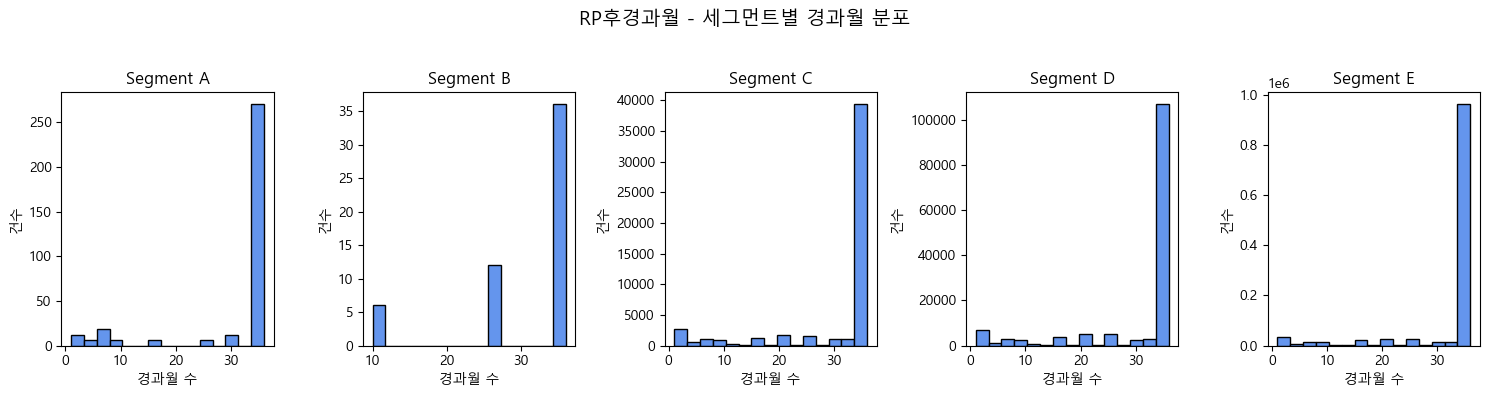

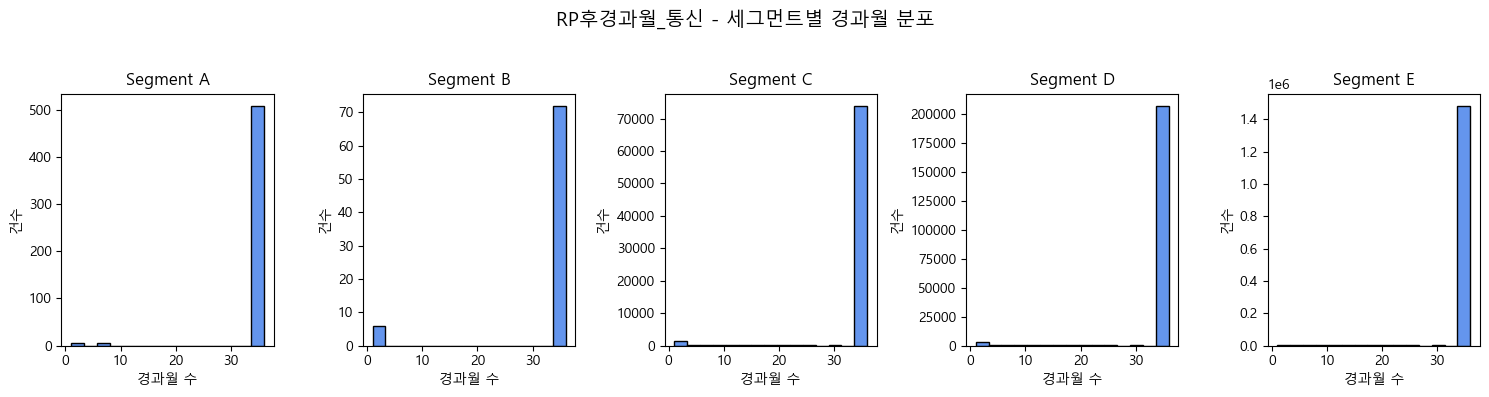

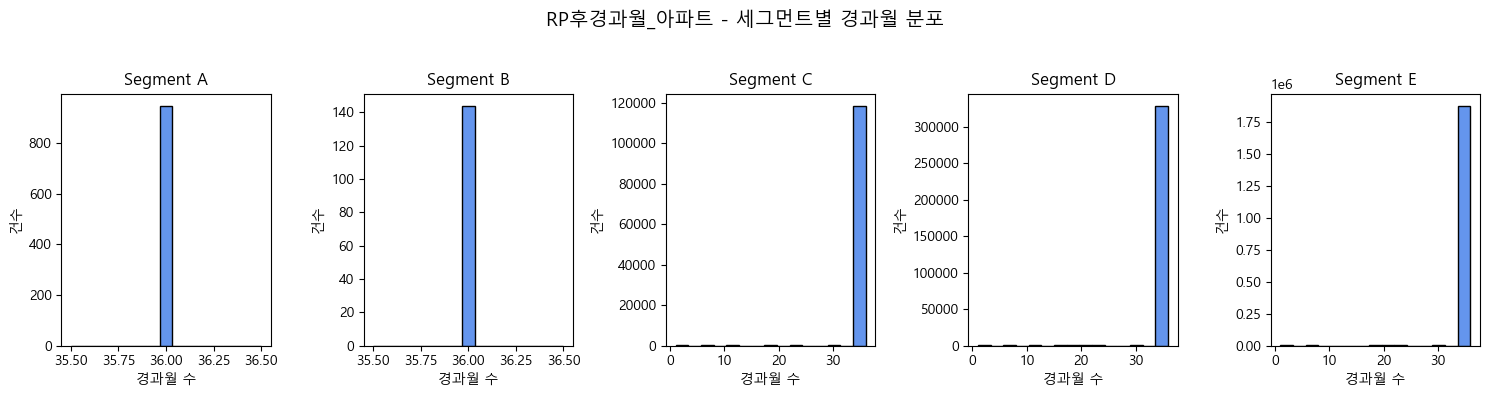

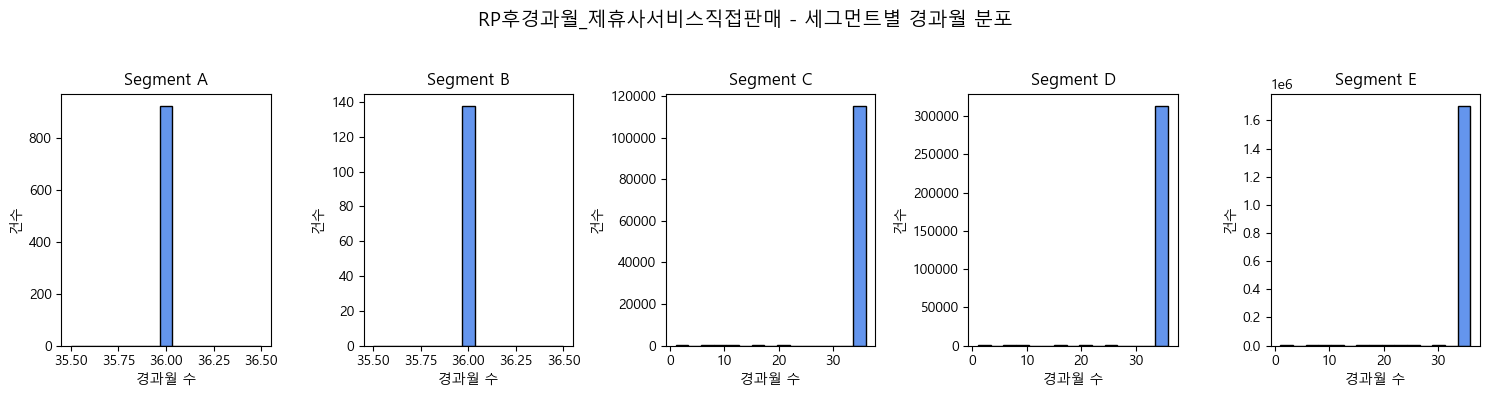

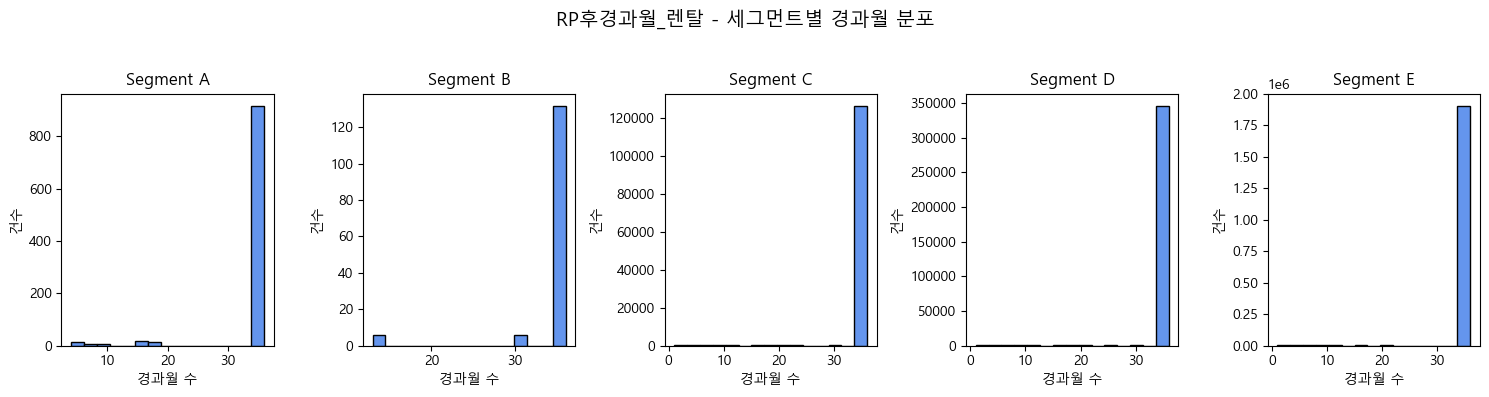

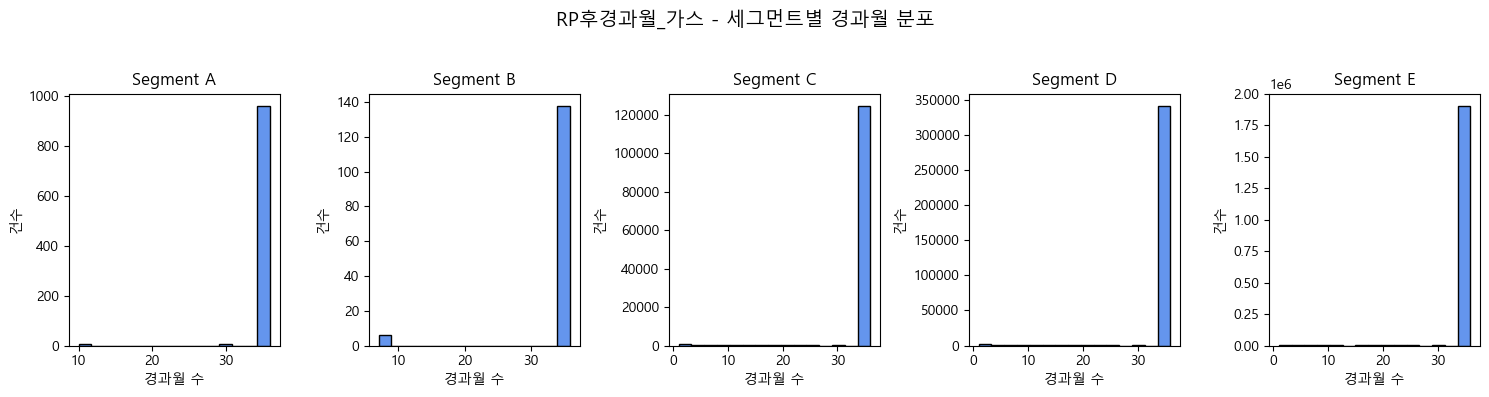

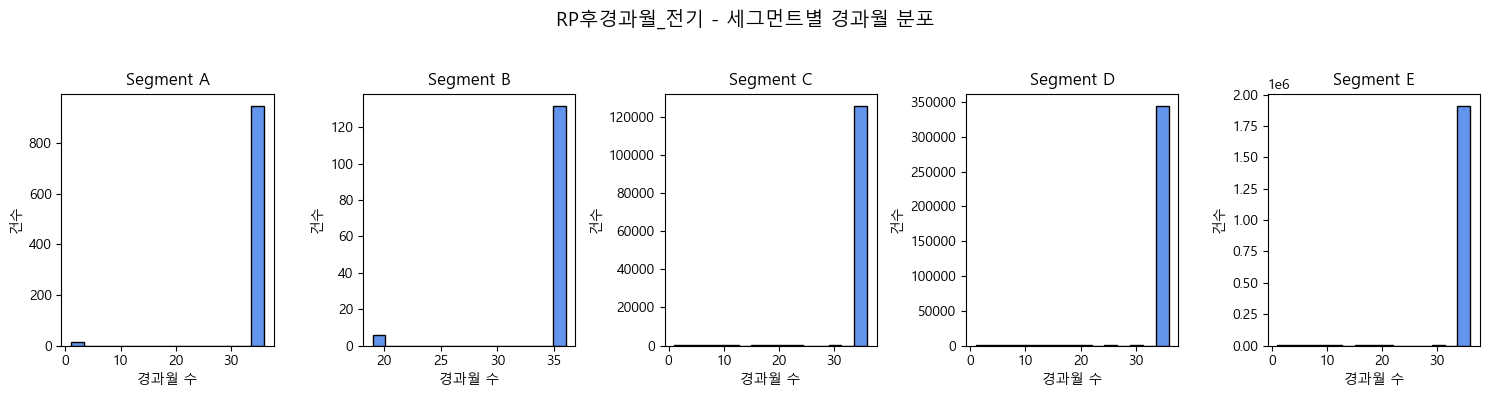

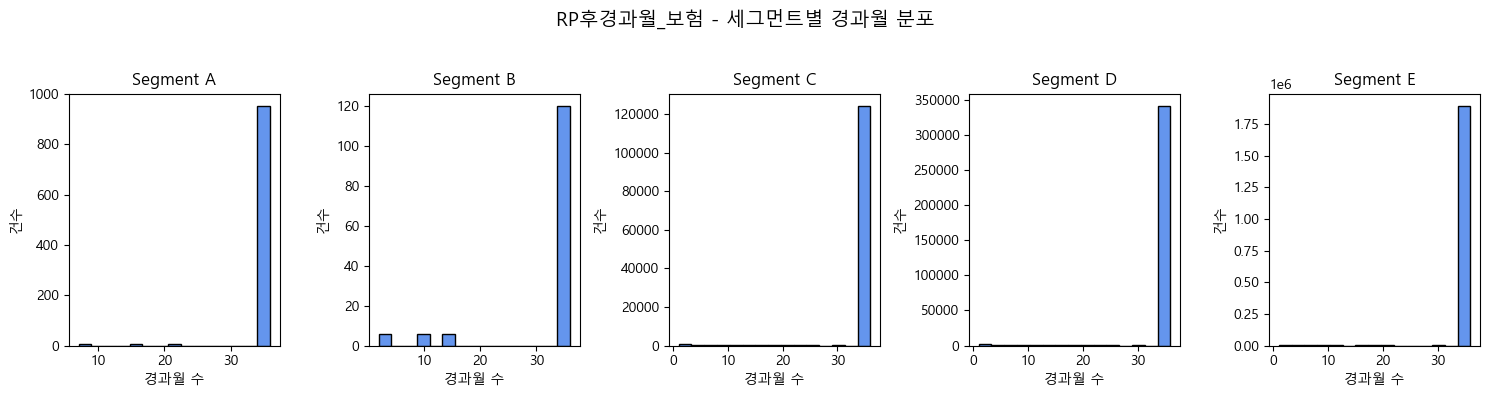

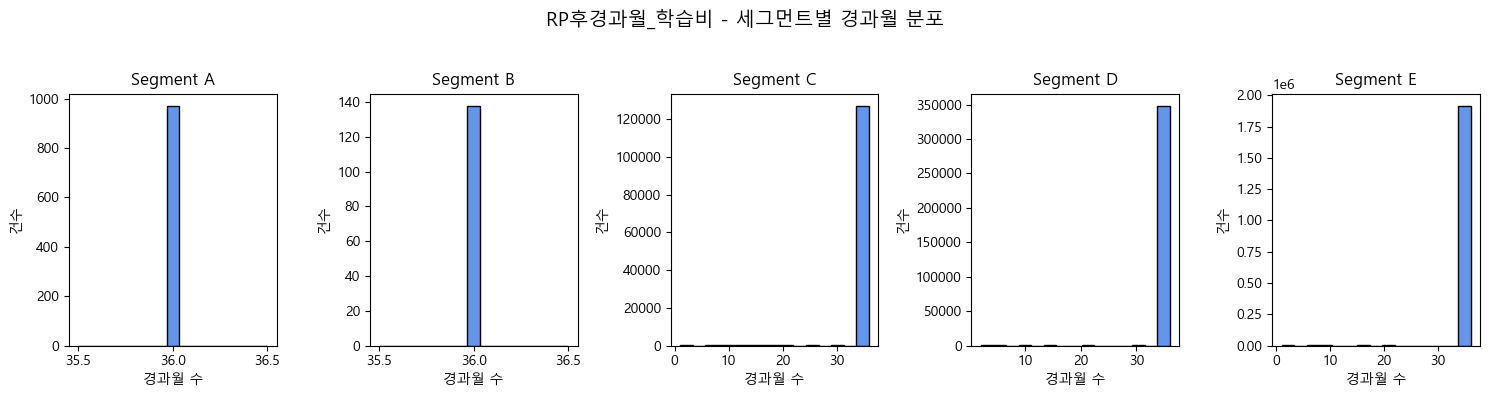

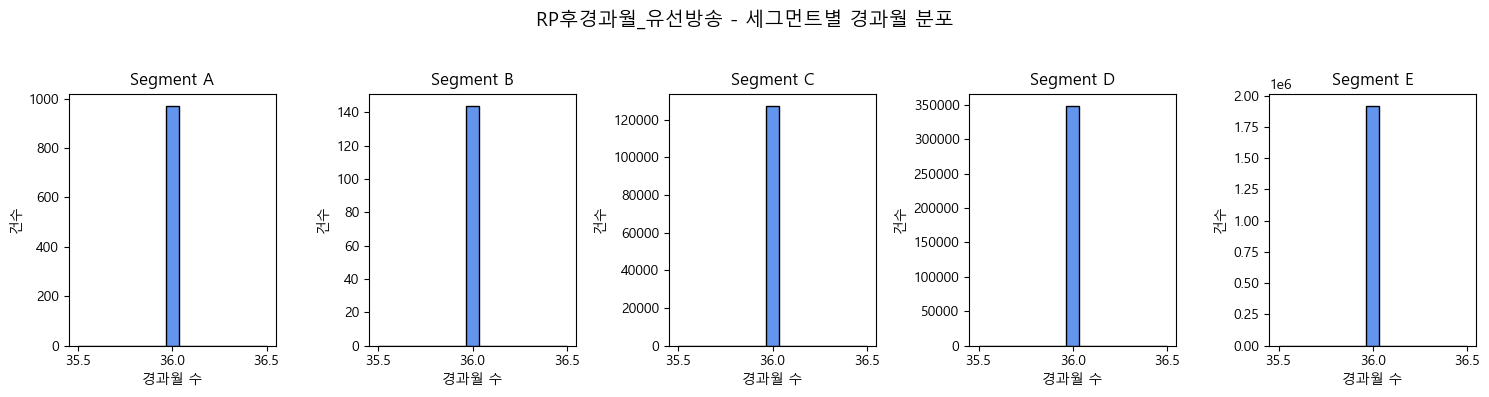

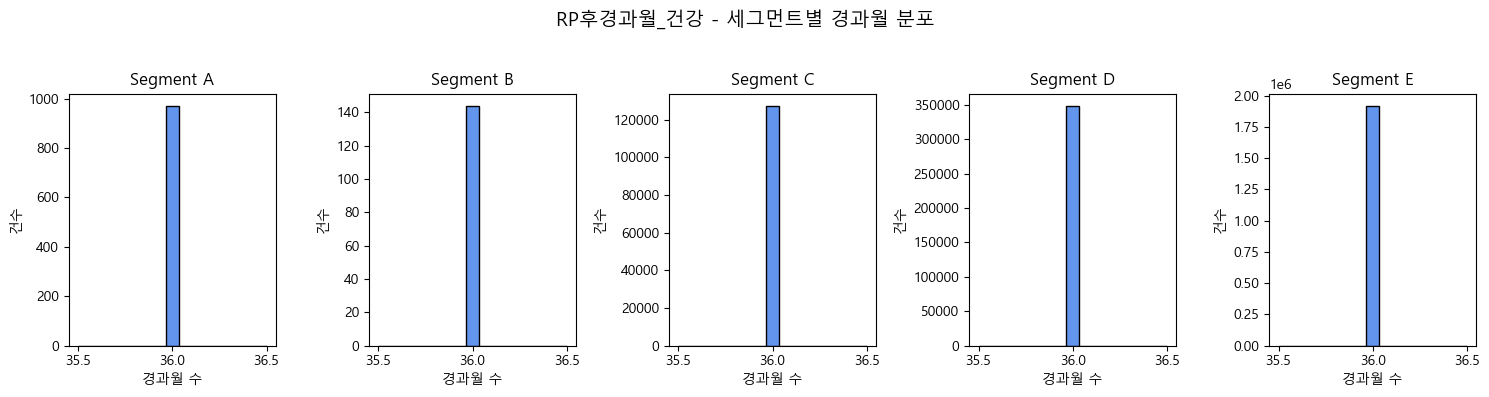

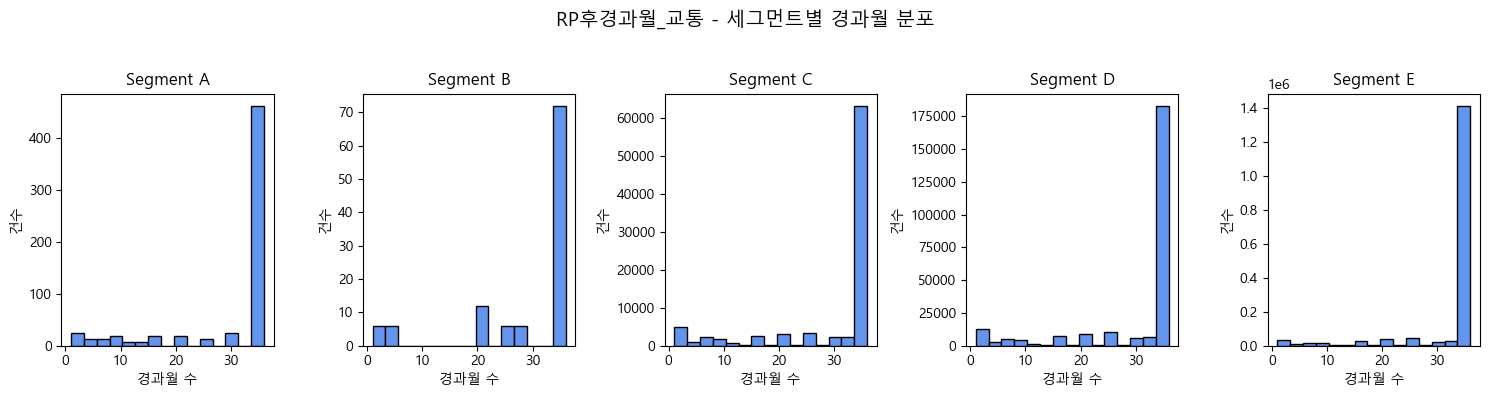

In [28]:
import matplotlib.pyplot as plt

# 1. 분석 대상 컬럼: 'RP후경과월' 포함 컬럼
target_cols = [col for col in 병합결과.columns if 'RP후경과월' in col]
segment_list = ['A', 'B', 'C', 'D', 'E']  # 문자형 세그먼트

# 2. 각 컬럼에 대해, 세그먼트별로 분포 시각화
for col in target_cols:
    plt.figure(figsize=(15, 4))
    
    for i, seg in enumerate(segment_list):
        subset = 병합결과[병합결과['Segment'] == seg]
        values = subset[col]
        values = values[values != 0]  # 0은 제외

        plt.subplot(1, len(segment_list), i+1)
        plt.hist(values.dropna(), bins=15, color='cornflowerblue', edgecolor='black')
        plt.title(f'Segment {seg}')
        plt.xlabel('경과월 수')
        plt.ylabel('건수')
    
    plt.suptitle(f'{col} - 세그먼트별 경과월 분포', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


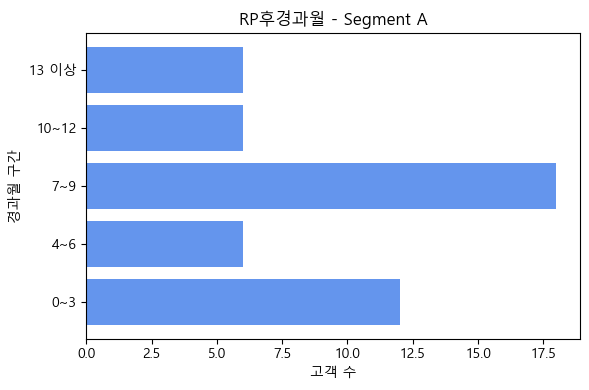

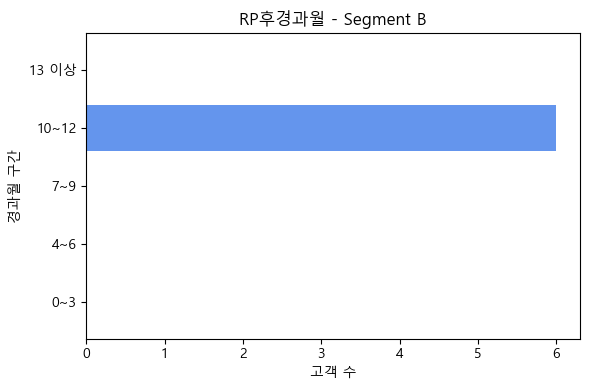

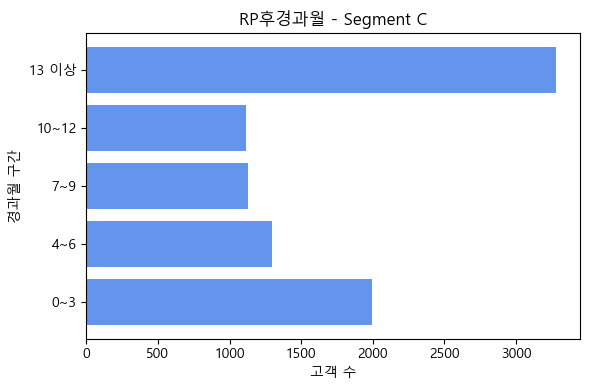

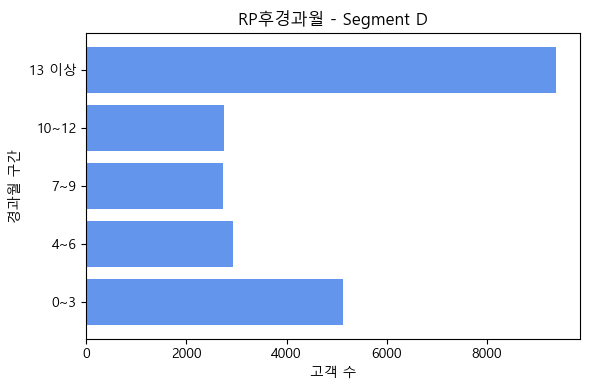

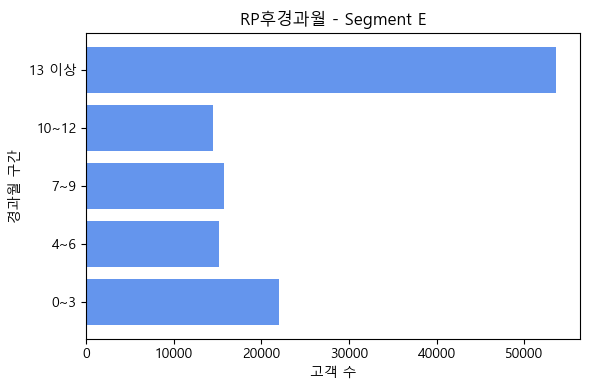

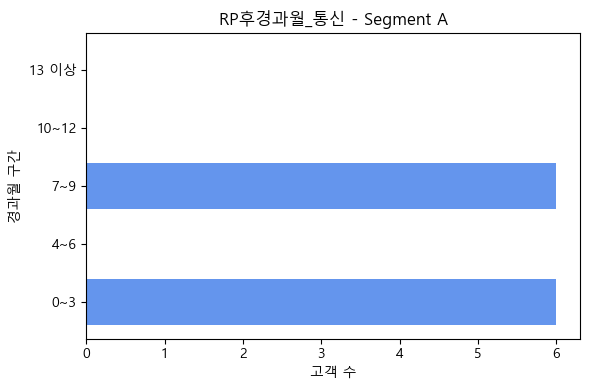

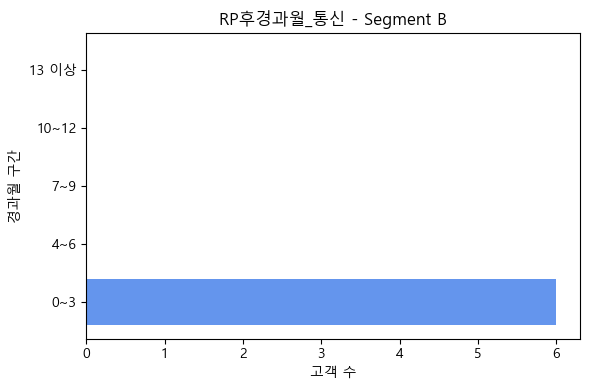

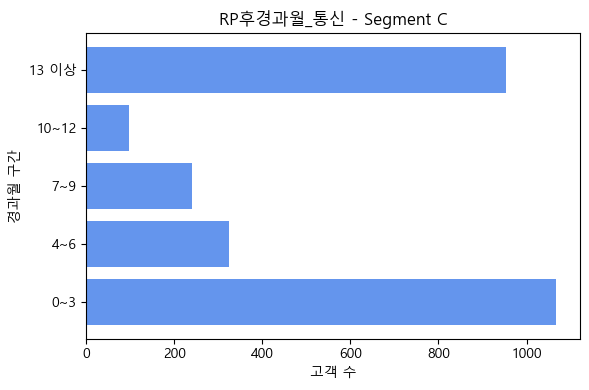

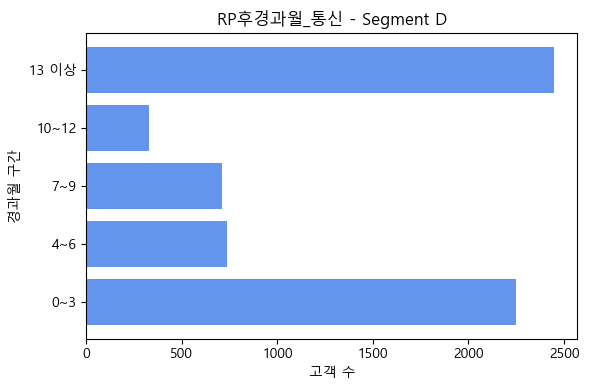

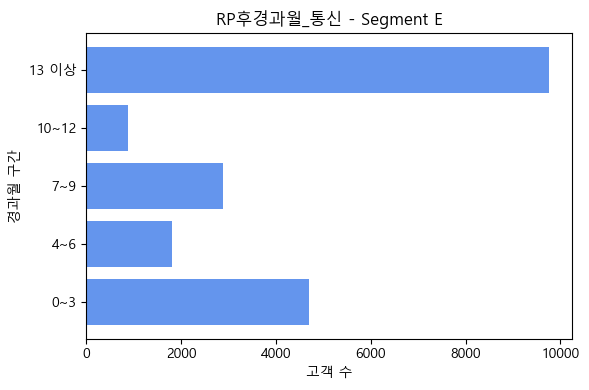

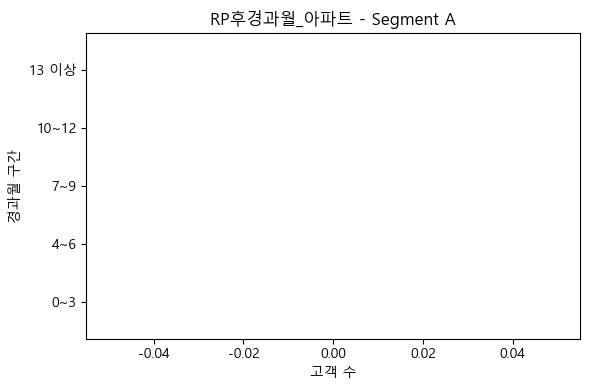

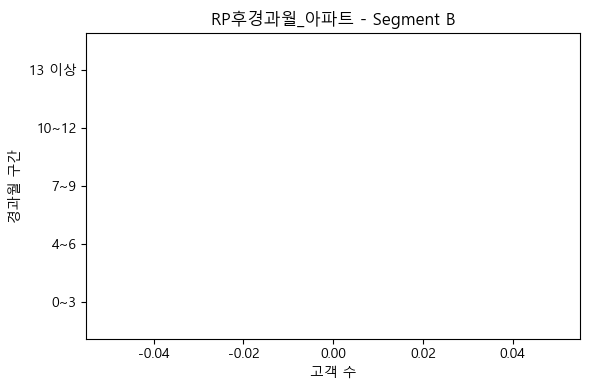

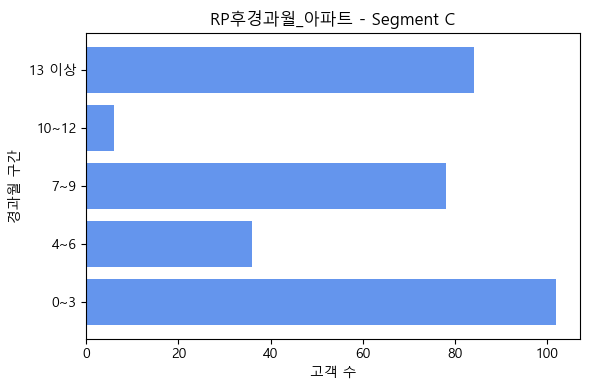

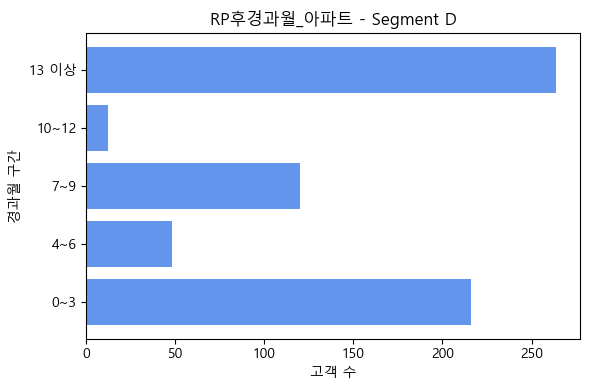

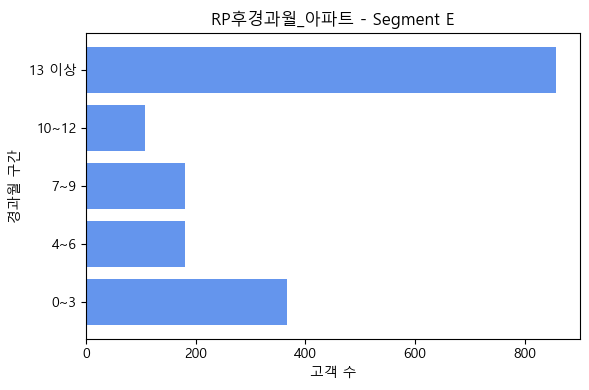

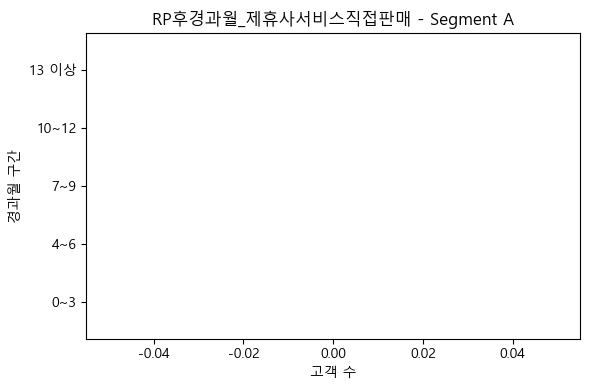

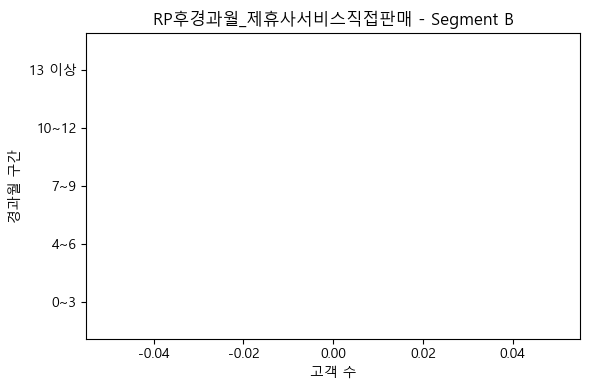

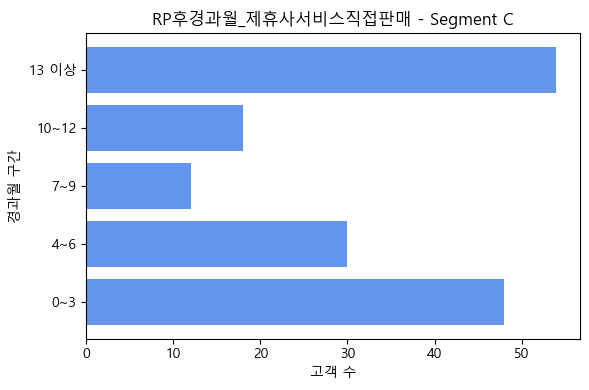

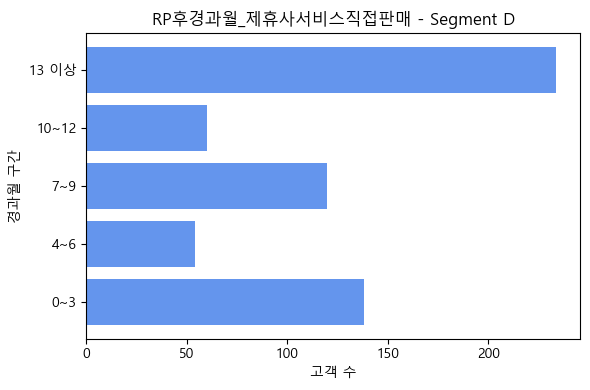

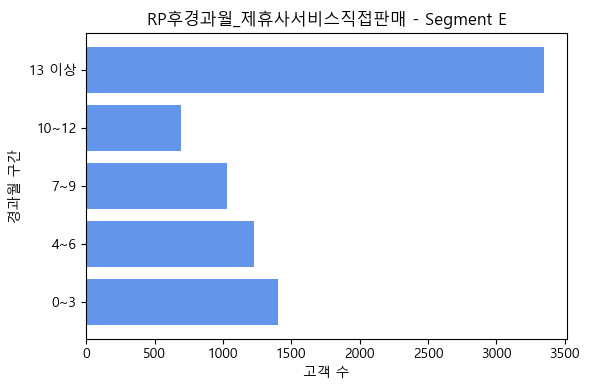

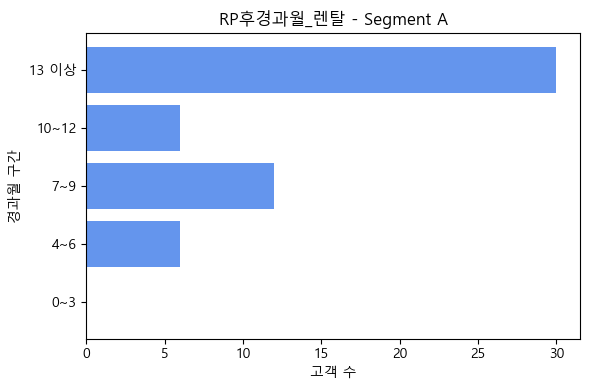

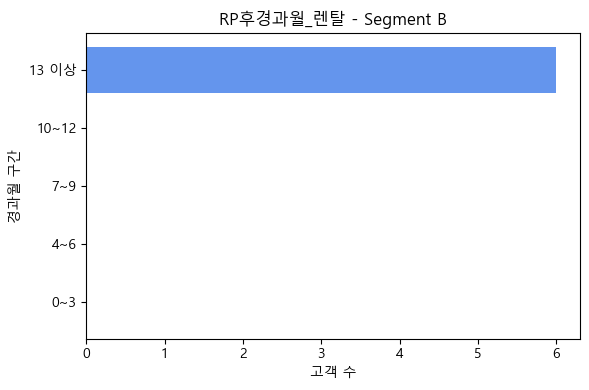

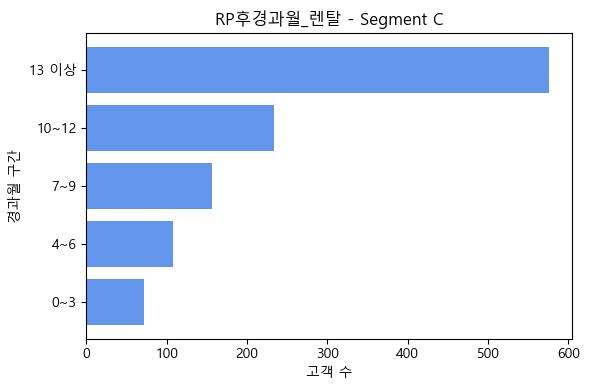

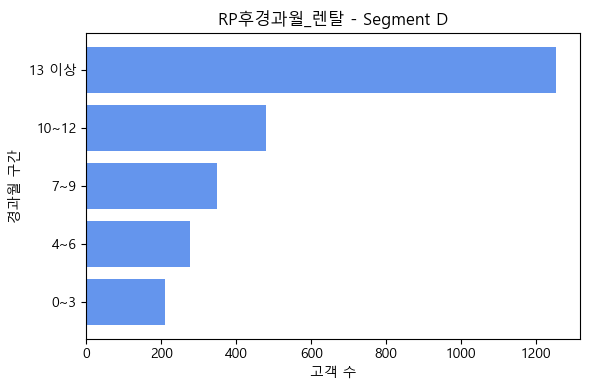

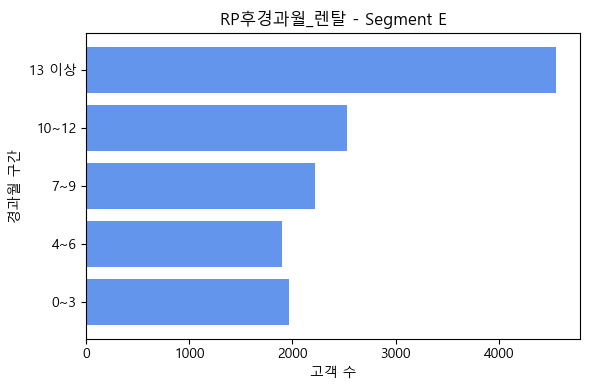

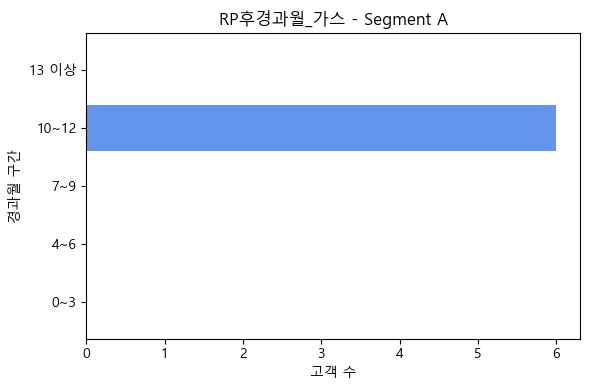

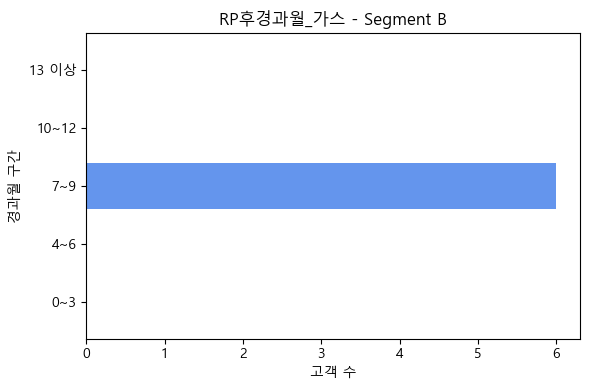

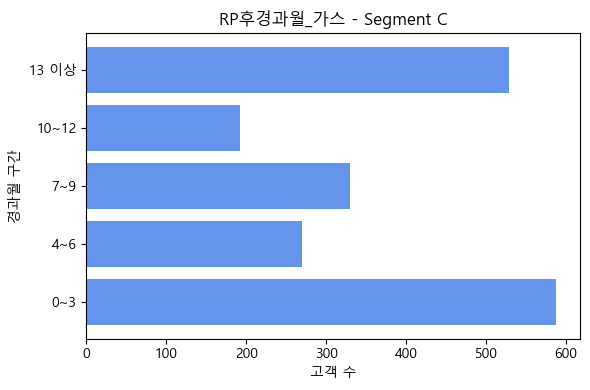

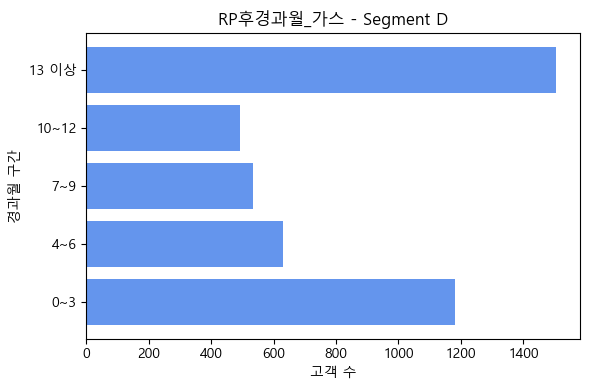

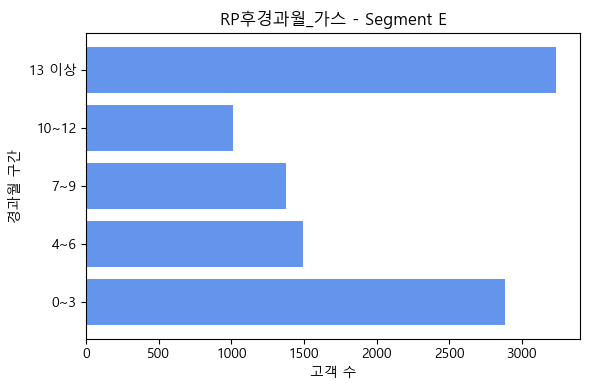

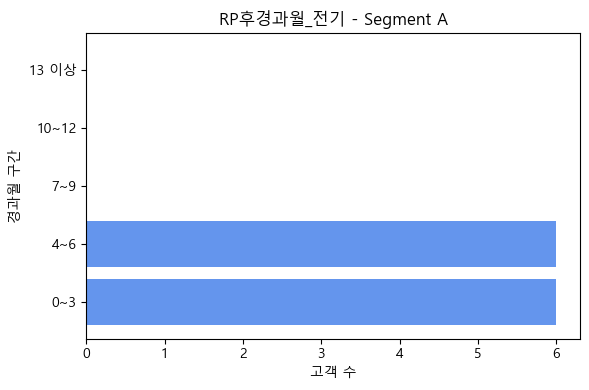

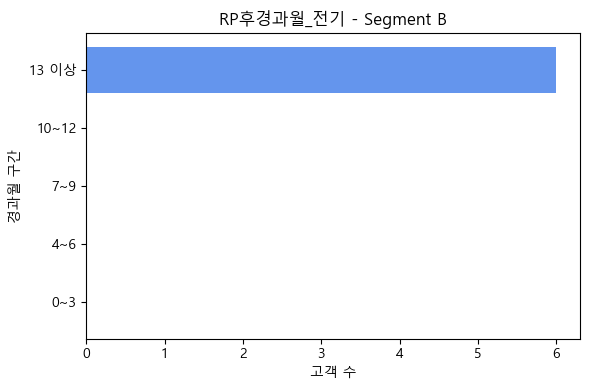

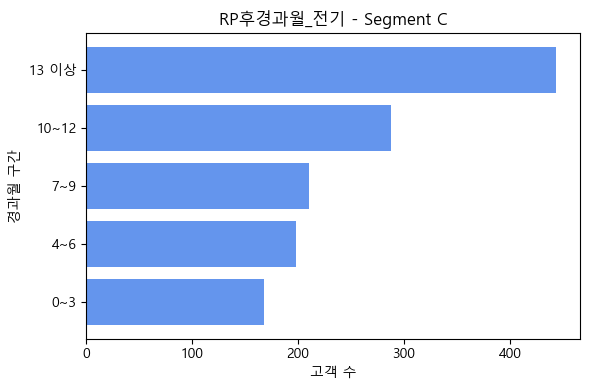

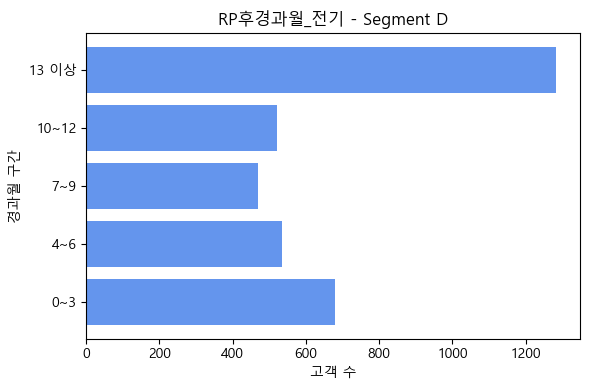

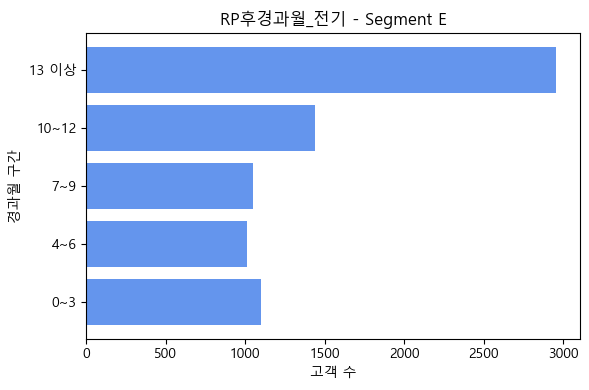

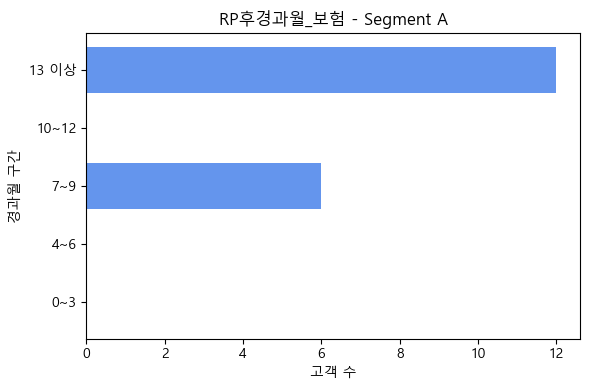

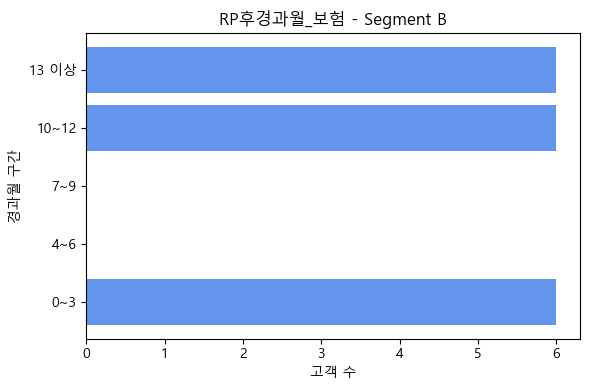

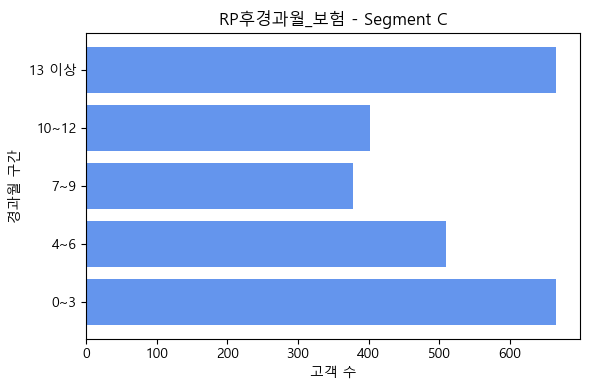

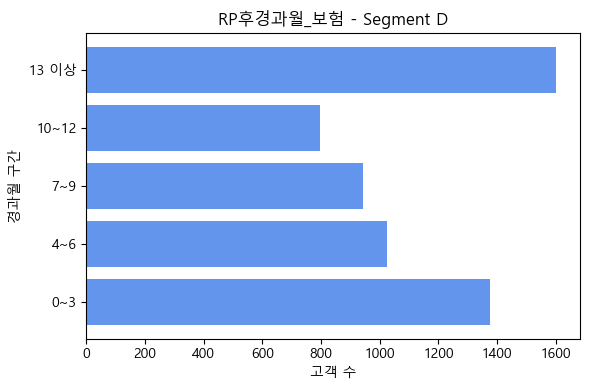

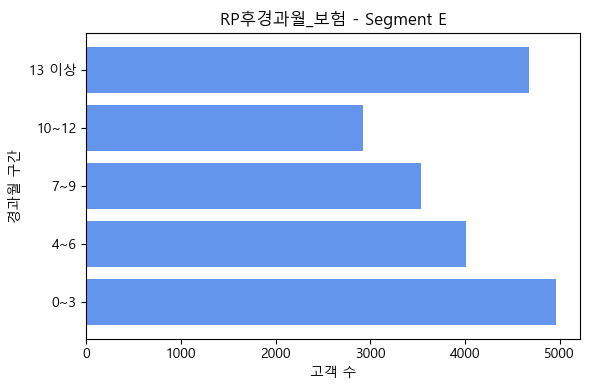

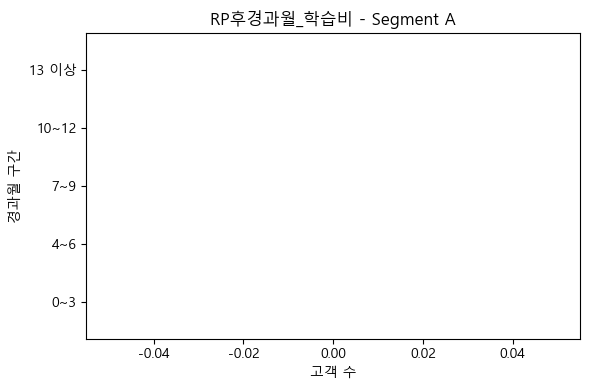

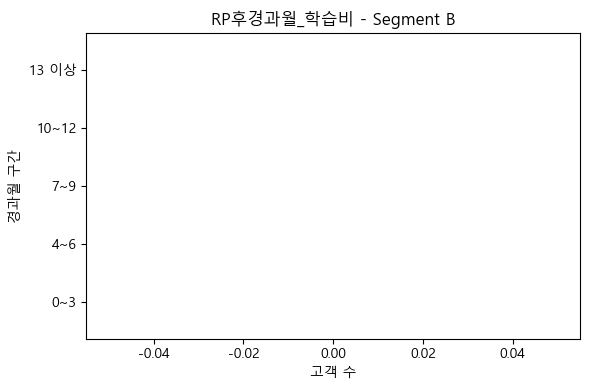

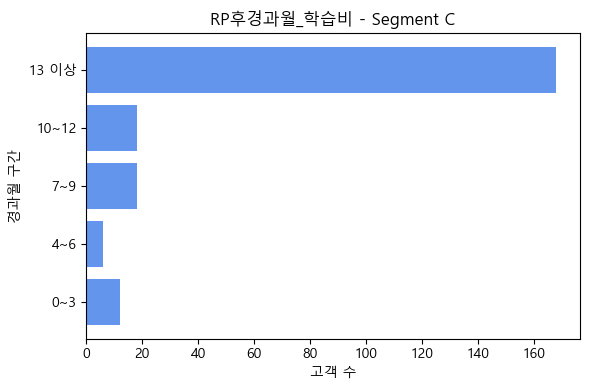

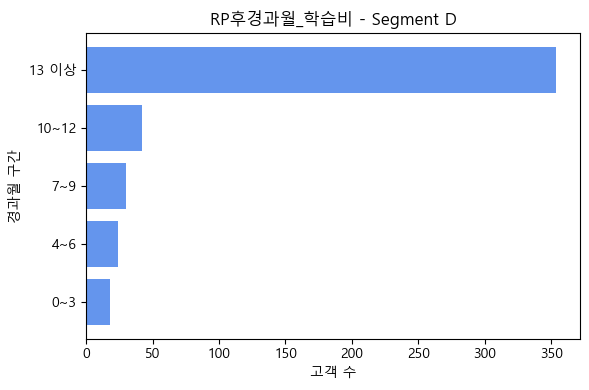

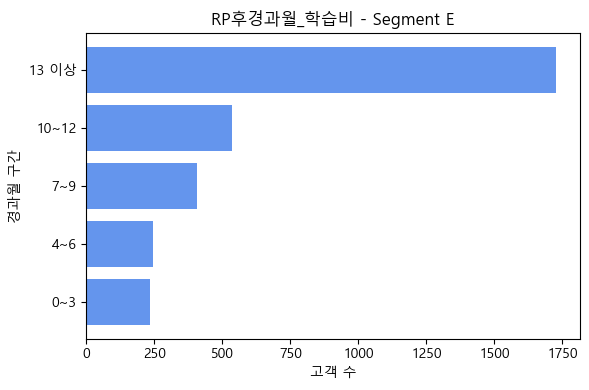

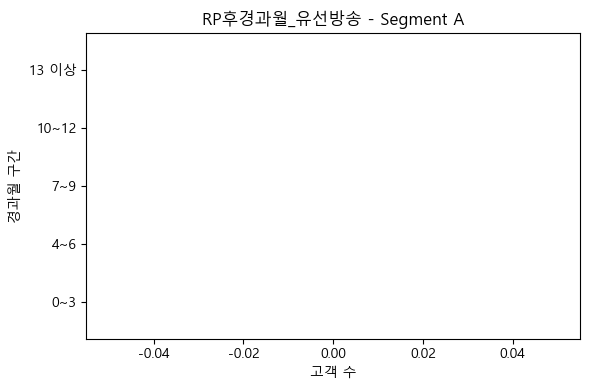

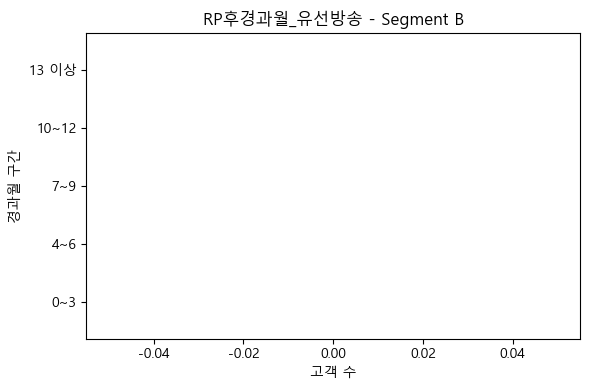

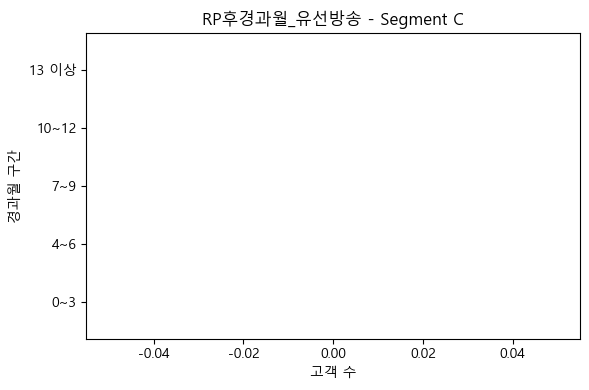

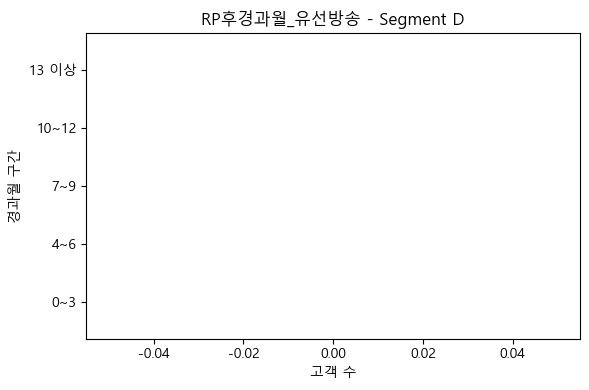

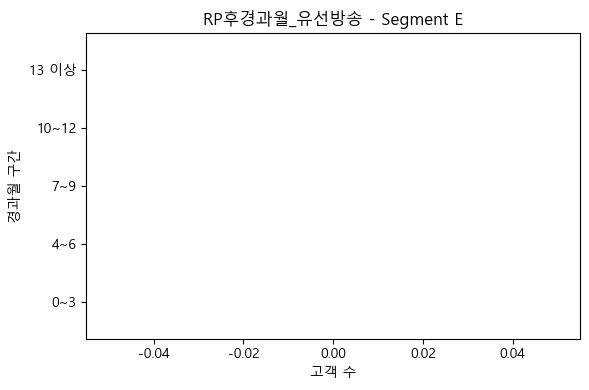

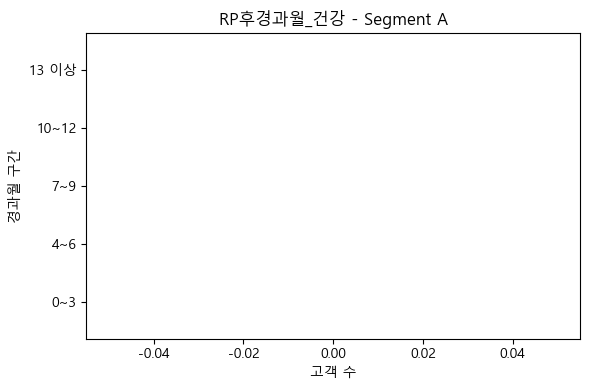

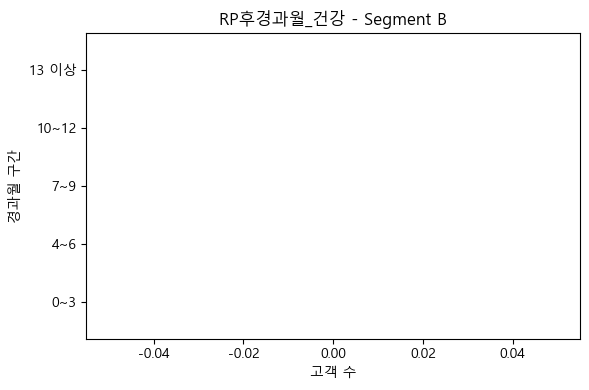

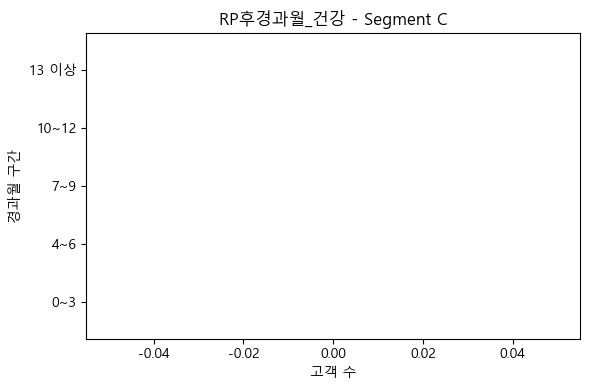

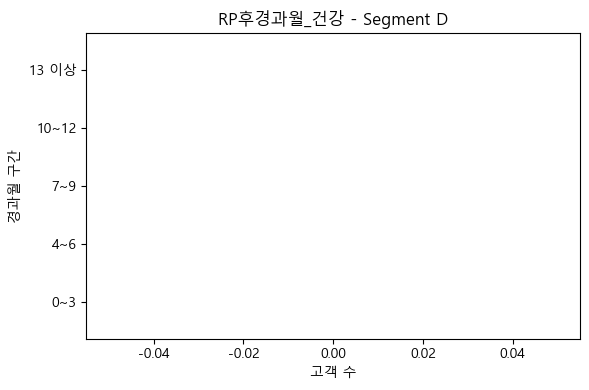

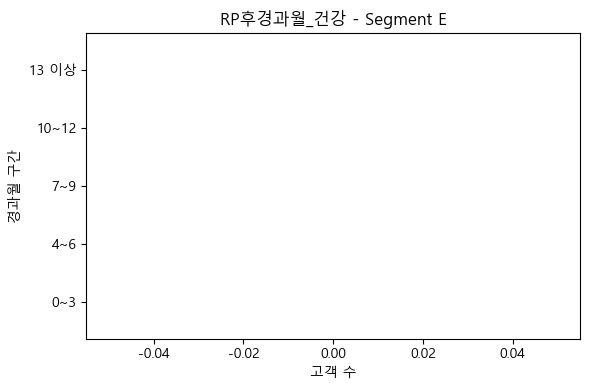

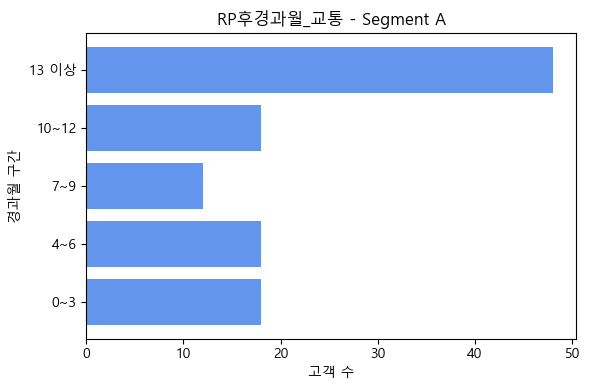

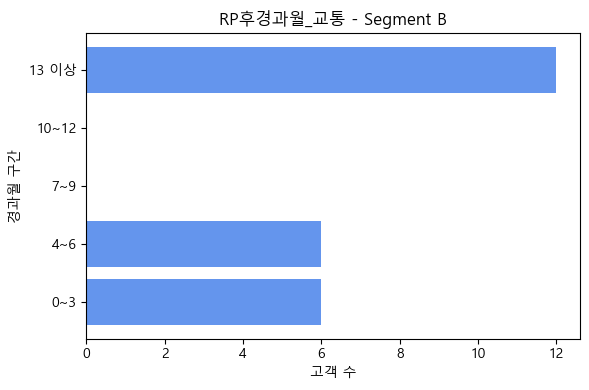

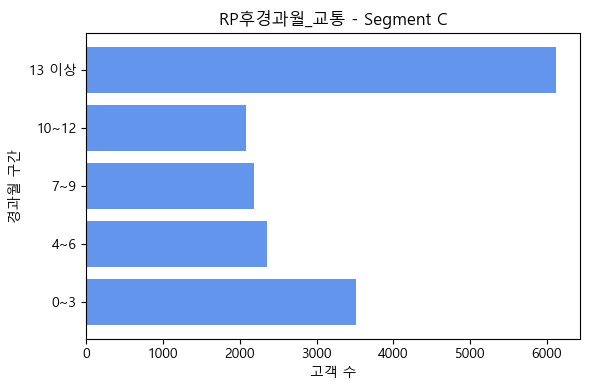

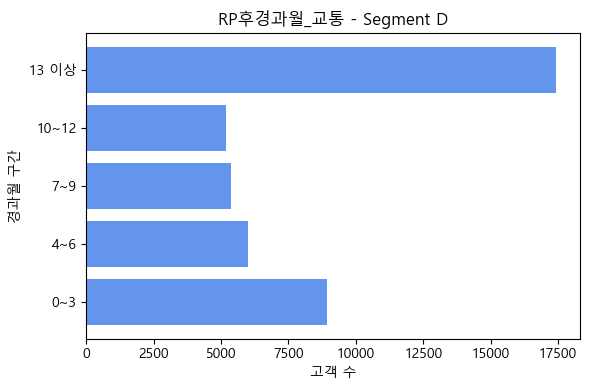

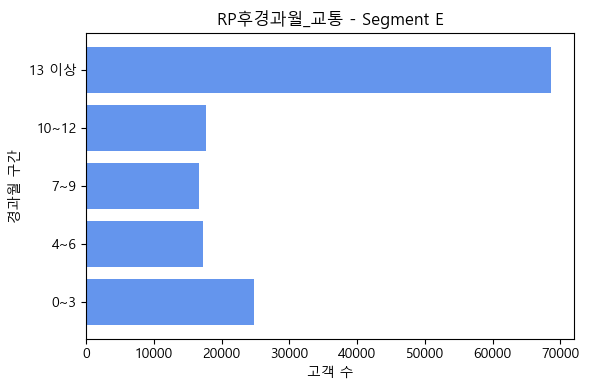

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import numpy as np

# 타겟 컬럼 및 세그먼트 정의
target_cols = [col for col in 병합결과.columns if 'RP후경과월' in col]
segment_list = ['A', 'B', 'C', 'D', 'E']

# 각 컬럼마다, 세그먼트별 경과월 구간별 건수 분포 → barh
for col in target_cols:
    for seg in segment_list:
        subset = 병합결과[병합결과['Segment'] == seg]
        values = subset[col]
        values = values[values != 0].dropna()

        # 히스토그램 빈 수동 지정 (0~12개월 기준)
        counts, bins = np.histogram(values, bins=[0, 3, 6, 9, 12, 24])
        bin_labels = ['0~3', '4~6', '7~9', '10~12', '13 이상']

        plt.figure(figsize=(6, 4))
        plt.barh(bin_labels, counts, color='cornflowerblue')
        plt.title(f'{col} - Segment {seg}')
        plt.xlabel('고객 수')
        plt.ylabel('경과월 구간')
        plt.tight_layout()
        plt.show()


In [ ]:
gas_col = 'RP후경과월'

활성비율 = (
    병합결과[gas_col] == 0
).groupby(병합결과['Segment']).mean().sort_values(ascending=False)

활성비율 = 활성비율.rename('경과월_0_비율')
활성비율 = (활성비율 * 100).round(2)

print(활성비율)


Segment
A    65.43
B    62.50
D    59.72
C    59.51
E    40.86
Name: 경과월_0_비율, dtype: float64


In [ ]:
# 'RP후경과월_가스' 기준으로 세그먼트별로 경과월 == 0 비율 계산
gas_col = 'RP후경과월_가스'

활성비율 = (
    병합결과[gas_col] == 0
).groupby(병합결과['Segment']).mean().sort_values(ascending=False)

활성비율 = 활성비율.rename('경과월_0_비율')
활성비율 = (활성비율 * 100).round(2)

print(활성비율)

Segment
D    0.59
C    0.59
E    0.32
A    0.00
B    0.00
Name: 경과월_0_비율, dtype: float64


In [ ]:
gas_col = 'RP후경과월_교통'

활성비율 = (
    병합결과[gas_col] == 0
).groupby(병합결과['Segment']).mean().sort_values(ascending=False)

활성비율 = 활성비율.rename('경과월_0_비율')
활성비율 = (활성비율 * 100).round(2)

print(활성비율)

Segment
A    37.04
C    31.82
D    28.63
B    25.00
E    14.31
Name: 경과월_0_비율, dtype: float64


In [36]:
gas_col = 'RP후경과월_전기'

활성비율 = (
    병합결과[gas_col] == 0
).groupby(병합결과['Segment']).mean().sort_values(ascending=False)

활성비율 = 활성비율.rename('경과월_0_비율')
활성비율 = (활성비율 * 100).round(2)

print(활성비율)

Segment
B    4.17
A    1.23
D    0.13
C    0.09
E    0.05
Name: 경과월_0_비율, dtype: float64


In [ ]:
gas_col = 'RP후경과월_보험'

활성비율 = (
    병합결과[gas_col] == 0
).groupby(병합결과['Segment']).mean().sort_values(ascending=False)

활성비율 = 활성비율.rename('경과월_0_비율')
활성비율 = (활성비율 * 100).round(2)

print(활성비율)

Segment
B    4.17
C    0.42
D    0.42
E    0.22
A    0.00
Name: 경과월_0_비율, dtype: float64


- 전체 세그먼트 (보험소비 X)

In [38]:
gas_col = 'RP후경과월_통신'

활성비율 = (
    병합결과[gas_col] == 0
).groupby(병합결과['Segment']).mean().sort_values(ascending=False)

활성비율 = 활성비율.rename('경과월_0_비율')
활성비율 = (활성비율 * 100).round(2)

print(활성비율)


Segment
A    46.30
B    45.83
C    39.73
D    38.68
E    21.56
Name: 경과월_0_비율, dtype: float64
